In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import random

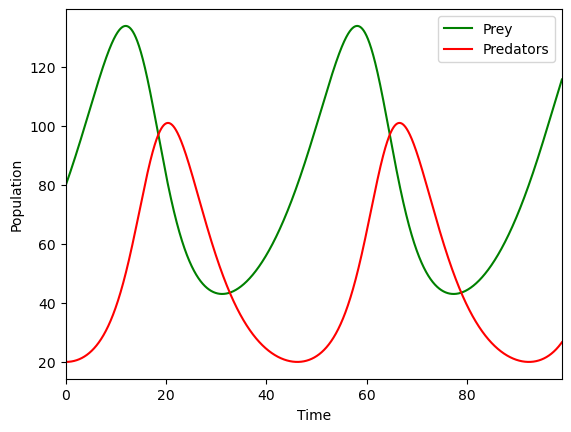

In [ ]:
# 1a closed form

def lotka_volterra(alpha=.1, beta=.002, gamma=.2, delta=.0025, startpop=(80,20),
                   dt=.0001):
    ''' 
    Simulates the continuous deterministic Lotka-Volterra predator-prey model using Euler's method.
    
    Args:
        alpha (float): Prey reproduction rate.
        beta (float): Predation rate.
        gamma (float): Predator death rate.
        delta (float): Predator growth rate per prey eaten.
        startpop (tuple): Initial populations as (prey_count, predator_count).
        dt (float): Timestep size for numerical integration.

    Returns:
        matplotlib.pyplot: A plot object displaying the trajectories of prey and predator 
                           populations over time.
    '''
    preypop, predpop = startpop # unpacking tuple
    # lists to store history
    timehist = [0]
    preyhist = [preypop]
    predhist = [predpop]
    # defining iteration range per value of dt
    time = 100
    iterations = int(time/dt)

    for _ in range(iterations):
        # equations
        preychange = (((alpha*preypop) - (beta*(preypop*predpop))) * dt)
        predchange = ((-(gamma*predpop) + (delta*(preypop*predpop))) * dt)
        # incrementing pops for next iteration
        preypop += preychange
        predpop += predchange
        # appending to history
        timehist.append(timehist[-1] + dt)
        preyhist.append(preypop)
        predhist.append(predpop)

    # plotting results
    plt.figure()
    plt.plot(timehist, preyhist, color='green', label='Prey')
    plt.plot(timehist, predhist, color='red', label='Predators')
    plt.xlim(min(range(time)), max(range(time)))
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    return plt

im1 = lotka_volterra()
im1.savefig(r".\\pics\\1a.png")

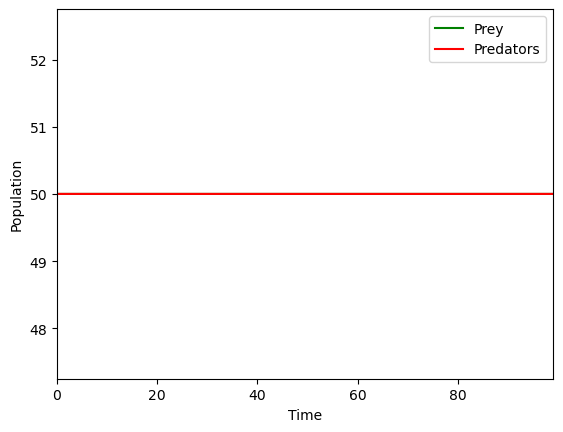

In [83]:
# 1b sensitivity analysis

im2 = lotka_volterra(alpha=0.25, beta =0.005, gamma=0.1, delta=0.002, startpop=(50,50))
im2.savefig(r".\\pics\\1b.png")

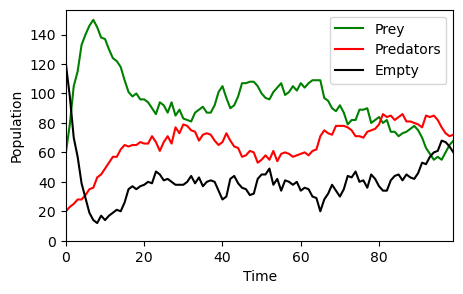

In [ ]:
# 2a network version

def graphLotkaVolterra(G, prey=.3, pred=.1, alpha=.5, beta=.25, gamma=.1, delta=.6, T=100):
    '''
    Simulates a stochastic Lotka-Volterra model on a network using synchronous updating.

    Args:
        G (networkx.Graph): The network to run the simulation on.
        prey (float): Initial fraction of nodes assigned as prey.
        pred (float): Initial fraction of nodes assigned as predators.
        alpha (float): Probability of prey reproduction into an empty neighbor.
        beta (float): Probability of a predator eating a neighboring prey.
        gamma (float): Probability of predator death.
        delta (float): Probability of a predator reproducing after eating prey.
        T (int): The total number of discrete time steps to simulate.

    Returns:
        tuple: A tuple (plt, history) containing the matplotlib plot of population counts 
               and a list of NetworkX graph objects representing the simulation state at each step.    
    '''
    # ensure ratio not > 1
    if prey + pred > 1:
        print("Error: ratio must not be greater than 1")
        return None
    
    # list to store history
    history = []

    # setup to init node states
    allnodes = list(G.nodes())
    random.shuffle(allnodes)
    numnodes = int(len(G.nodes()))
    numprey = int(numnodes * prey)
    numpred = int(numnodes * pred)
    preynodes = allnodes[:numprey]
    prednodes = allnodes[numprey: numprey+numpred]

    # assigning initial attributes
    nx.set_node_attributes(G, 'empty', 'state')
    for node in preynodes:
        G.nodes[node]['state'] = 'prey'
    for node in prednodes:
        G.nodes[node]['state'] = 'pred'

    # main loop
    for t in range(T):
        # save current state and create next one
        history.append(G.copy())
        next_G = G.copy()
        for node in list(G.nodes()):
            current_state = G.nodes[node]['state']
            if current_state == 'prey':
                # list of neighbor types
                empties = [nbr for nbr in list(G.neighbors(node)) if G.nodes[nbr]['state'] == 'empty']
                preds = [nbr for nbr in list(G.neighbors(node)) if G.nodes[nbr]['state'] == 'pred']
                # prey reproduction
                if empties and random.random() <= alpha:
                    next_G.nodes[random.choice(empties)]['state'] = 'prey'
                # predation
                if preds and random.random() <= beta:
                    # predator reproduction
                    if random.random() <= delta:
                        next_G.nodes[node]['state'] = 'pred'
                    # no predator reproduction
                    else:
                        next_G.nodes[node]['state'] = 'empty'
            elif current_state == 'pred':
                # predator death
                if random.random() <= gamma:
                    next_G.nodes[node]['state'] = 'empty'
        G = next_G
    
    # plotting
    preycounts = []
    predcounts = []
    emptycounts = []
    for graph in history:
        preycount = 0
        predcount = 0
        emptycount = 0
        for n in graph.nodes():
            state = graph.nodes[n]['state']
            if state == 'prey':
                preycount += 1
            elif state == 'pred':
                predcount += 1
            else:
                emptycount += 1
        preycounts.append(preycount)
        predcounts.append(predcount)
        emptycounts.append(emptycount)
    t = range(len(history))
    plt.figure(figsize=(5,3))
    plt.plot(t, preycounts, color='green', label='Prey')
    plt.plot(t, predcounts, color='red', label='Predators')
    plt.plot(t, emptycounts, color='black', label='Empty')
    plt.xlim(min(range(T)), max(range(T)))
    plt.ylim(bottom=0)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()

    return (plt, history)

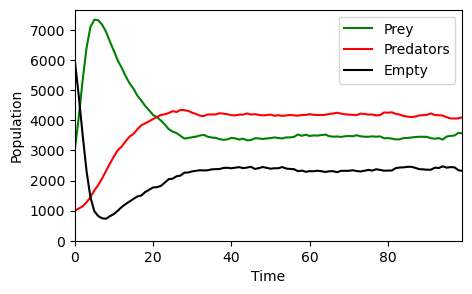

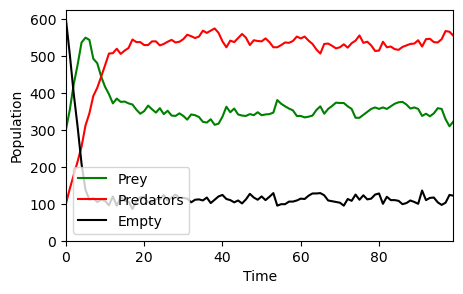

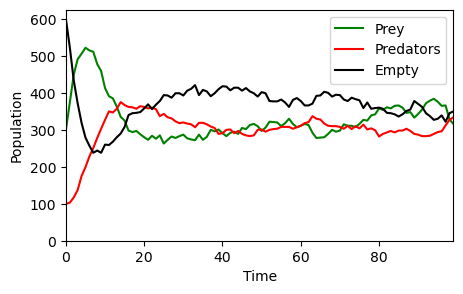

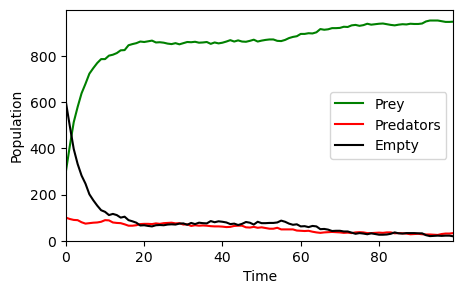

In [90]:
# 2b network structure

G1 = nx.grid_2d_graph(100, 100)
G2 = nx.gnp_random_graph(1000, .05)
G3 = nx.barabasi_albert_graph(1000, 2)
G4 = nx.watts_strogatz_graph(1000, 2, .05)

plot1, history1 = graphLotkaVolterra(G1)
plot1.savefig(r".\\pics\\grid2d.png")
plot2, history2 = graphLotkaVolterra(G2)
plot2.savefig(r".\\pics\\gnp_random.png")
plot3, history3 = graphLotkaVolterra(G3)
plot3.savefig(r".\\pics\\ba.png")
plot4, history4 = graphLotkaVolterra(G4)
plot4.savefig(r".\\pics\\watts_strogatz.png")

2c scratch

All of the simulations begin with the empty nodes sharply dropping. This is due to the parameters: delta gives a strong chance of predator reproduction and gamma gives a small chance of predator death, so the "board fills up quickly," so to speak. Something of note as well is that none of the simulations appear to exhibit cyclic behavior. [why]

grid: everyone has exactly 4 neighbors except for those on the periphery, which in this case is an insignificant number. since there is effectively no variation between nodes as far as centrality, clustering, degree, etc, the system rapidly converges to a steady state and exhibits little variation from that point on.

random: more predators, about 500-600 of the total. doesnt take as long to reach stable state. populations diverge more.
initially predators and prey both rise, but once they fill up about 80% of the network, the predators begin to cut into the prey population. this is likely bc prey have enough empty nodes around them up to that point to replenish their population. empty nodes are fuel for both predator and prey; they can be likened to the base of the food web and the populations of the other two can be thought of as causally downstream of the empty population (empty->prey->pred)

ba: opposite of gnp in some ways. populations relatively even and switch places often, but empty seems to predominate slightly, though not by much. much more chaotic in general and running it many times and for longer lengths always leads to chaotic results past the initial "setup" period (probably smth to do with the probabilistic chance of selecting a node with outsized degree). similar to gnp in the initial pattern of empty down, pred/prey up. again we can see the pattern where prey and pred are inversely correlated to eachother, but both are inversely correlated to empty primarily

ws: prey in this model completely dominate. out of curiosity i tried increasing T and found that prey invariably reaches 100% saturation anywhere between 200 and 400 timesteps. predators on the other hand do *not* increase along with prey in the initial period as they did previously.

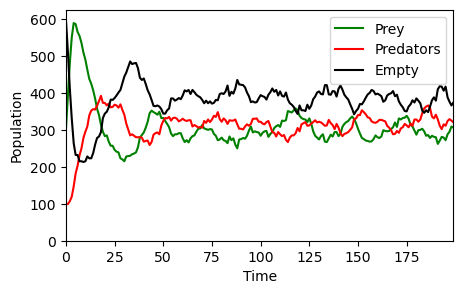

In [ ]:
plt, hist = graphLotkaVolterra(G3, T=200)

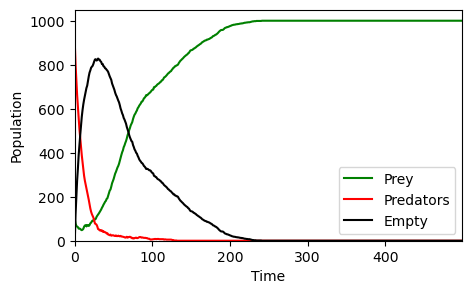

In [116]:
plt, hist = graphLotkaVolterra(G4, pred=.9, prey=.1, T=500)

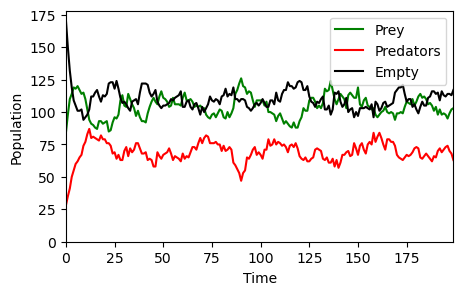

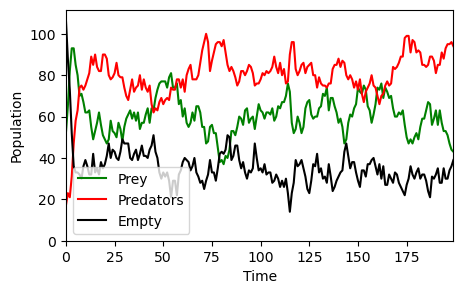

In [ ]:
# trying on my final project graphs out of curiosity
xfer = nx.read_graphml(r"C:\Users\User\Documents\cfb project\data\transferportal\cleaned\transfer_portal_2023_cleaned.graphml")
rec = nx.read_graphml(r"C:\Users\User\Documents\cfb project\data\recruiting\projections\projected_2023.graphml")
pltx, histx = graphLotkaVolterra(xfer, T=200)
pltr, histr = graphLotkaVolterra(rec, T=200)